In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(url)

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
iris.shape

(150, 5)

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


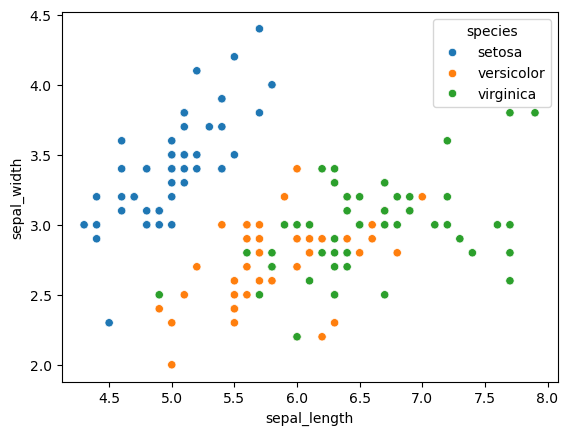

In [13]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

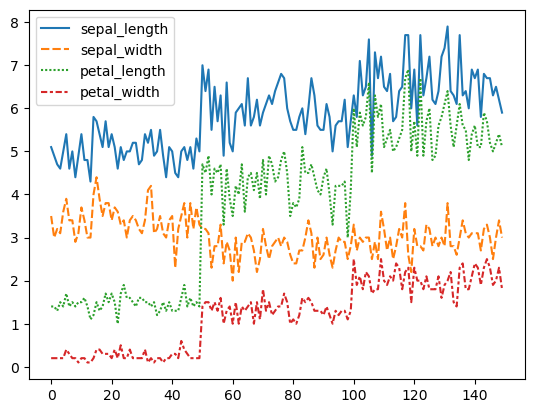

In [15]:
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

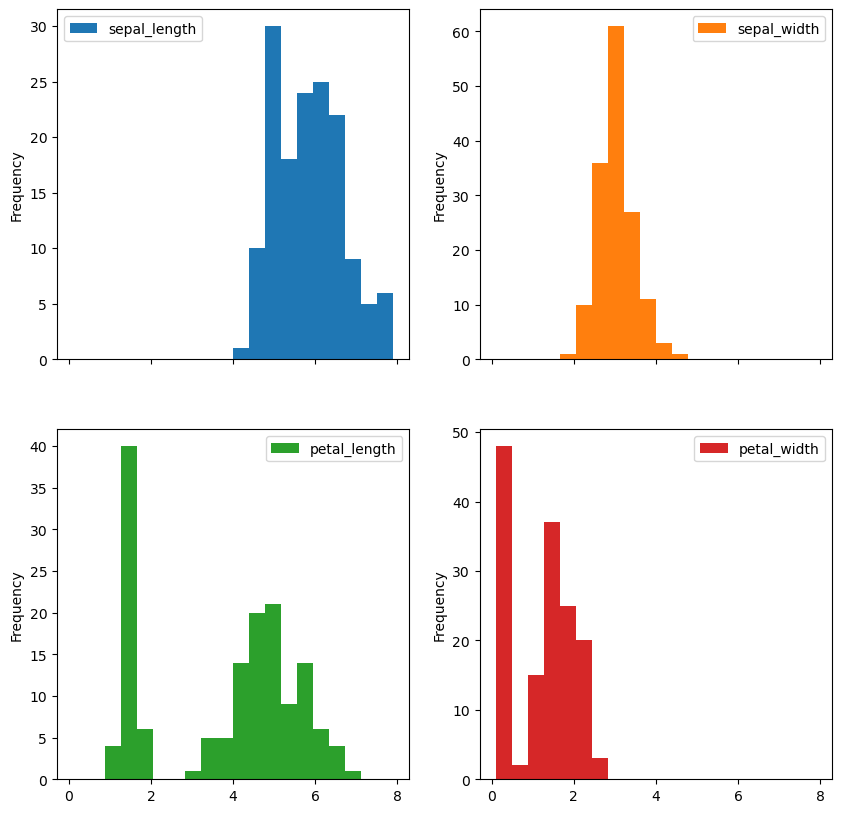

In [17]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()

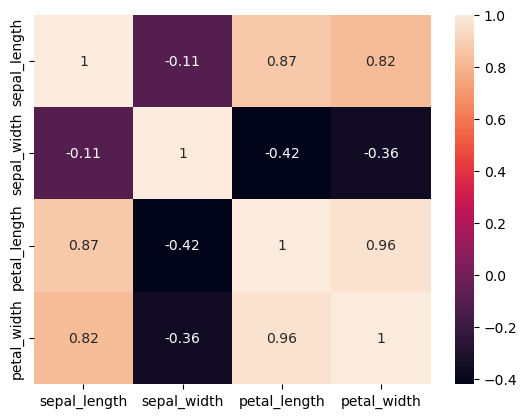

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = iris.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

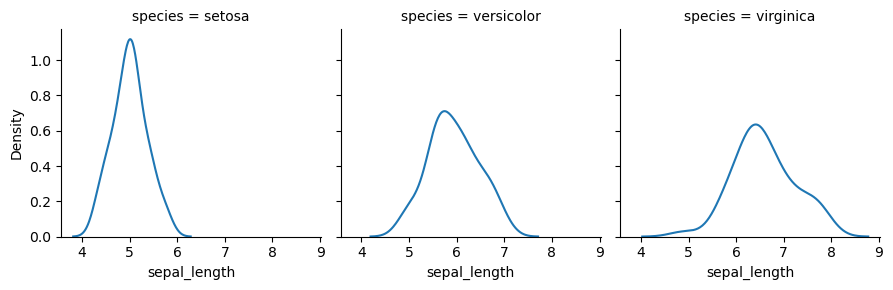

In [23]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

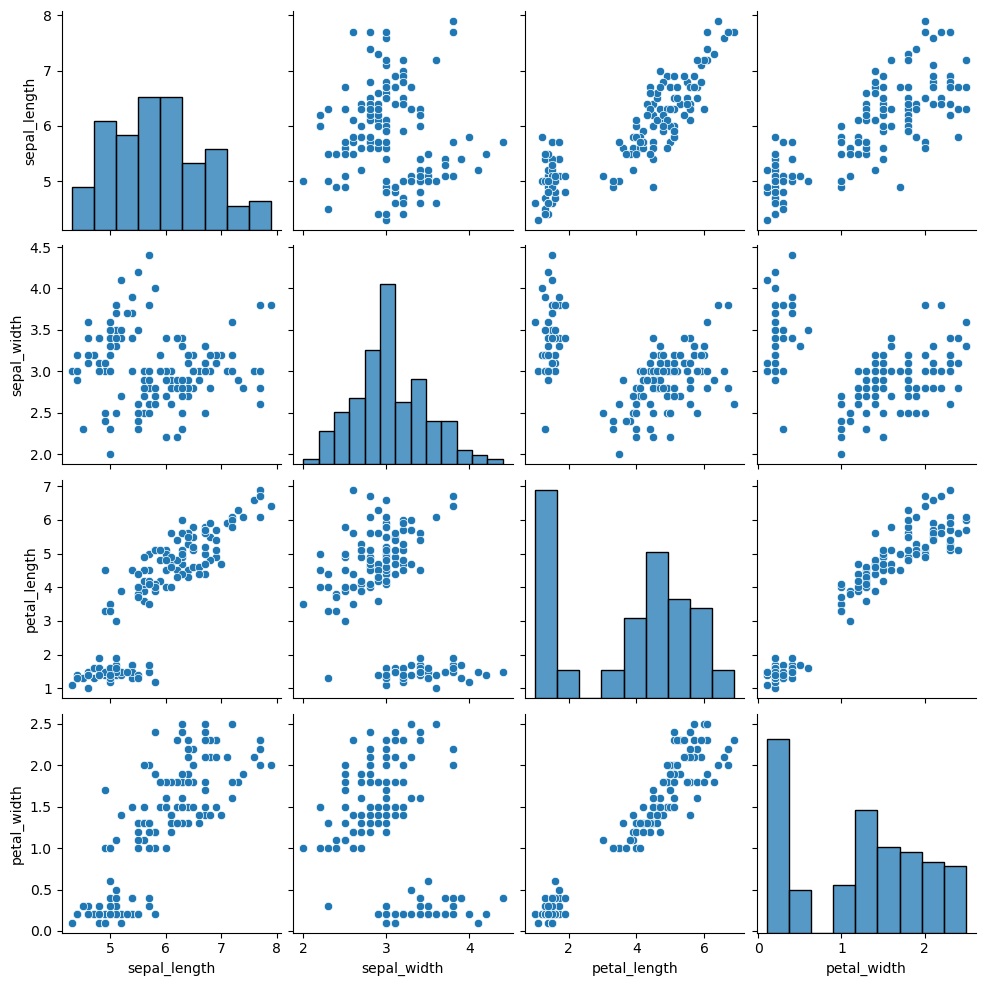

In [25]:
sns.pairplot(iris)

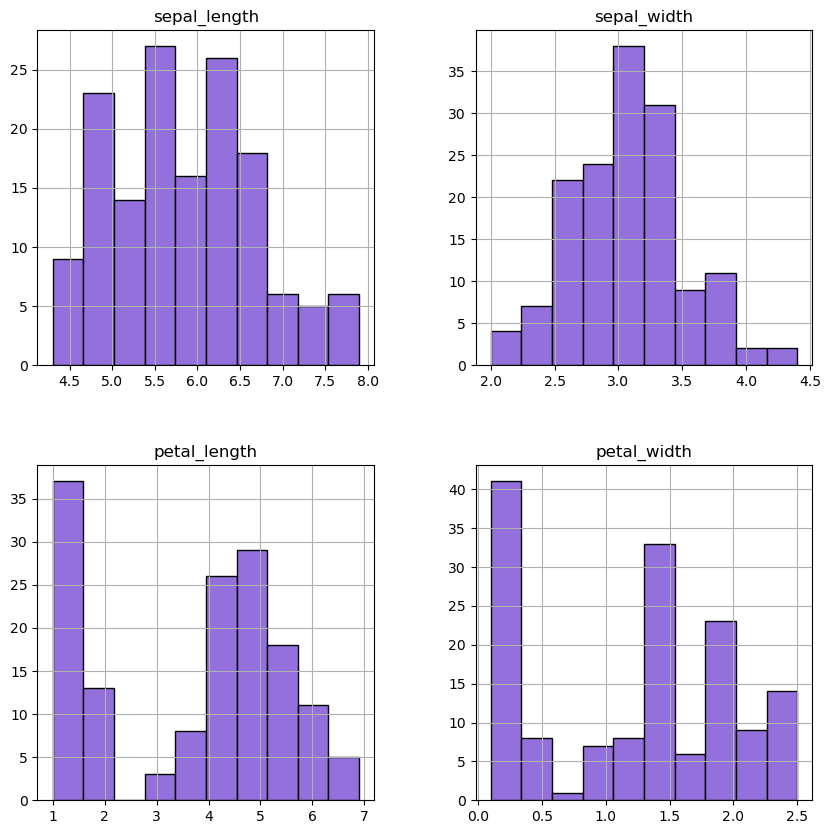

In [27]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [31]:
# Select only numeric columns
numeric_iris = iris.select_dtypes(include=['float64', 'int64'])

numeric_iris.corr().style\
    .background_gradient(cmap='coolwarm')\
    .format(precision=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [35]:
x = iris.drop('species', axis=1)
y= iris.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

print("Accuracy:", knn.score(x_test, y_test))

Accuracy: 0.9666666666666667


In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [43]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

1.0

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

1.0